# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Посмотрим на первые 10 строк табллицы.**

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Построим общую гистограмму для всех числовых столбцов таблицы.

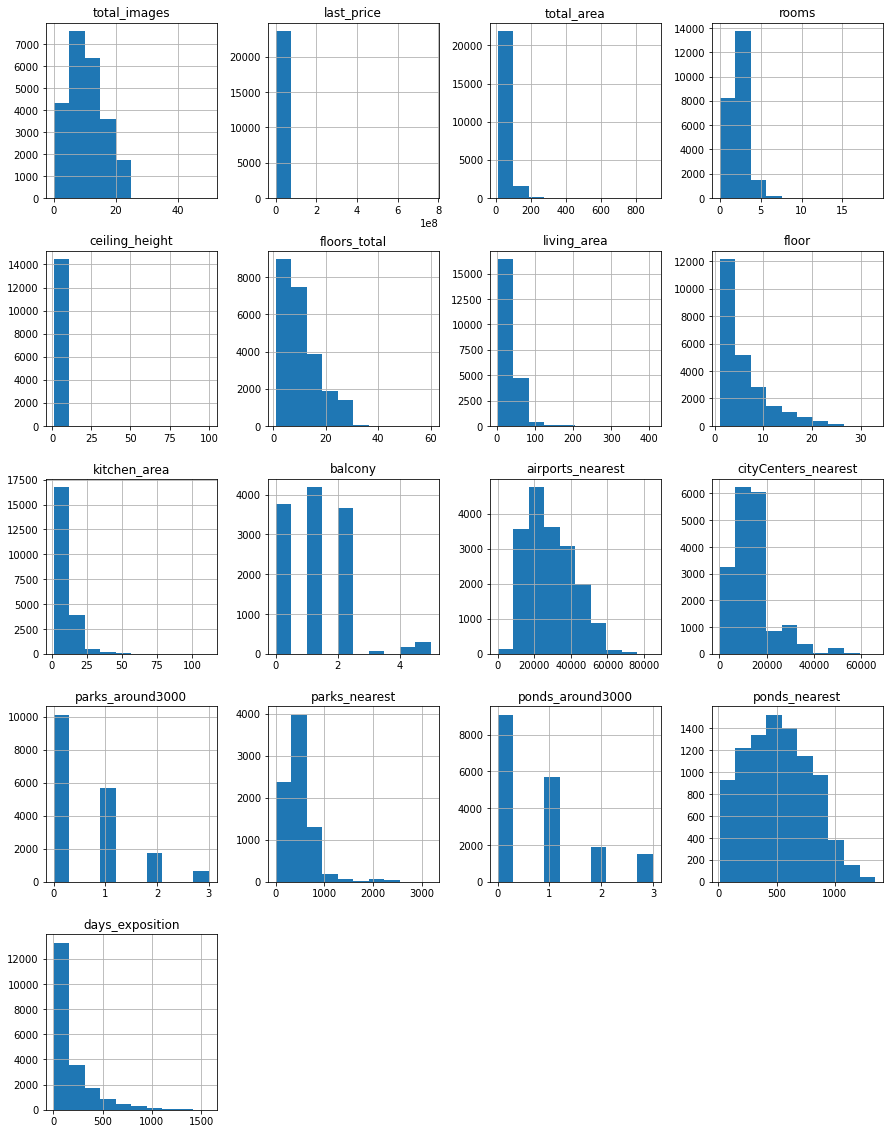

In [4]:
data.hist(figsize=(15, 20))
plt.show()

**Видим, что в предоставленных данных названия столбцов не соответсятвуют правилам, но в таблице присутствуют пропуски, есть несоответсвие типов данных в некоторых столбцах. Всё это мы исправим на следующем этапе.**

### Предобработка данных

#### Приведем названия столбцов к стандартному виду.

In [1]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

NameError: name 'data' is not defined

#### Посчитаем количество пропусков в таблице.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Заполним пропуски там где это возможно:
- для критерия `ceiling_height` оставим пропущенные значения так как есть, потому что нет какой-то зависимости для высоты потолка и другой характеристики дома и данной таблицы.
- для критерия `floors_total` так же оставим пропуски на месте, так как предполагать что либо о количестве этажей в доме по извезтной информации невозможно.
- для критерия `living_area` поступим аналогично предыдущим. Сложно предположить какая часть от квартиры не является жилой без дополнительной информации.
- для критерия `is_apartment` логично заменить пропуски на `False` так как скорее всего при заполнении посчитали, что неуказанное значение тоже самое что и отрицательный ответ.
- для критерия `kitchen_area` оставим пропущенные значения так как есть, потому что нет какой-то зависимости для площади кухни и другой характеристики дома и данной таблицы.
- для критерия `balcony` логично заменить пропуски на `0` так как скорее всего при заполнении посчитали, что неуказанное значение тоже самое что и отсутствие балконов.
- для `locality_name` оставим пропуски без изменений. Этот критерий невозможно определить из других значений.
- для `airports_nearest` оставим пропуски без изменений. Этот критерий невозможно определить из других значений.
- для `city_centers_nearest` оставим пропуски без изменений. Этот критерий невозможно определить из других значений.
- для критерия `parks_around_3000` логично заменить пропуски на `0` так как скорее всего при заполнении посчитали, что неуказанное значение тоже самое что и отсутствие парков рядом.
- аналогично и для `ponds_around_3000`.
- для `parks_nearest` и `ponds_nearest` оставим пропуски как есть так как это может значить как отсутствие парка рядом, так и отсутствие информации о ближайшем.
- критерий `days_exposition` можем перезаписать опираясь на строчки в таблице. Посчитаем текущую дату и найдем разность для пропущенных строчек

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

**Пропуски в столбце `days_exposition` заполним после изменения формата столбцов, так как жто упростит вычисление даты.**

#### Изменим типы данных для некоторых столбцов. 
**Для столбца `first_day_exposition` нужно изменить тип с `object` на `date`, для `is_apartment` с `object` на `bool`, для  `balcony` с `float` на `int`, для `parks_around_3000` с `float` на `int`,  для `ponds_around_3000` с `float` на `int`**

In [8]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

**Теперь заполним пропуски в столбце `days_exposition`:**

In [9]:
data['days_exposition'] = data['days_exposition'].fillna((pd.to_datetime("today") - data['first_day_exposition']).dt.days)

**Посмотрим на количество пропусков и типы данных теперь:**

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition             0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Теперь разберемся с неявными дубликатами в столбце с названиями:

**Приведем все записи к нижнему регистру**

In [12]:
data['locality_name'] = data['locality_name'].str.lower()

In [13]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

**Заменим найденные неявные дубликаты** \
***Оснвная часть дубликатов связанна с использованием буквы -ё- в словах. Иногда при написании точки опускают и пишут -е-, из-за чего и возникают неявные дубликаты***

In [14]:
false_names_list = ['городской поселок янино-1', 'посёлок мурино', 'поселок мурино', 'деревня кудрово', 
                    'поселок городского типа красный бор', 'поселок городского типа лебяжье', 'поселок городского типа кузьмоловский',
                    'поселок аннино', 'поселок новый свет', 'село никольское', 'поселок бугры', 'поселок городского типа рощино', 
                    'городской посёлок рощино', 'поселок победа', 'поселок терволово', 'поселок городского типа советский', 
                    'городской посёлок советский', 'поселок петровское', 'поселок городского типа токсово', 'поселок городского типа вырица', 
                    'поселок тельмана', 'городской поселок большая ижора', 'поселок городского типа большая ижора', 'городской посёлок павлово', 
                    'поселок городского типа лесогорский', 'поселок городского типа имени свердлова', 'поселок городского типа рябово', 
                    'посёлок городского типа рябово', 'поселок поляны', 'посёлок городского типа мга', 'поселок мичуринское', 'поселок ильичёво', 
                    'посёлок при железнодорожной станции вещево', 'поселок гаврилово', 'поселок городского типа назия', 'поселок старая малукса', 
                    'посёлок при железнодорожной станции приветнинское', 'поселок мельниково', 'поселок усть-луга', 'поселок любань', 
                    'поселок стеклянный', 'поселок городского типа форносово', 'поселок сумино', 'поселок возрождение', 'поселок лисий нос', 
                    'поселок жилгородок', 'посёлок станции громово', 'поселок коробицыно', 'поселок кобралово', 'поселок лесное', 
                    'поселок перово', 'поселок пансионат зелёный бор']


new_names_list = ['городской посёлок янино-1', 'мурино', 'мурино', 'кудрово', 'посёлок городского типа красный бор', 
                  'посёлок городского типа лебяжье', 'посёлок городского типа кузьмоловский', 'посёлок аннино', 'посёлок новый свет',
                  'никольское', 'посёлок бугры', 'посёлок городского типа рощино', 'посёлок городского типа рощино', 'посёлок победа', 
                  'посёлок терволово', 'посёлок городского типа советский', 'посёлок городского типа советский', 'посёлок петровское', 
                  'посёлок городского типа токсово', 'посёлок городского типа вырица', 'посёлок тельмана', 'городской посёлок большая ижора', 
                  'городской посёлок большая ижора', 'посёлок городского типа павлово', 'городской посёлок лесогорский', 
                  'посёлок городского типа имени свердлова', 'поселок рябово', 'поселок рябово', 'посёлок поляны', 'городской посёлок мга', 
                  'посёлок мичуринское', 'посёлок ильичёво', 'поселок станции вещево', 'посёлок гаврилово', 'городской посёлок назия', 
                  'посёлок старая малукса', 'поселок станции приветнинское', 'посёлок мельниково', 'посёлок усть-луга', 'любань', 
                  'посёлок стеклянный', 'посёлок городского типа форносово', 'посёлок сумино', 'посёлок возрождение', 'посёлок лисий нос', 
                  'посёлок жилгородок', 'поселок громово', 'посёлок коробицыно', 'посёлок кобралово', 'коттеджный посёлок лесное', 
                  'посёлок перово', 'посёлок пансионат зелёный бор']
for name in false_names_list:
    data.loc[name == data['locality_name'], 'locality_name'] = new_names_list[false_names_list.index(name)]


#### Обработаем редкие и выбивающиеся значения во всех столбцах

Проанализировав гистограммы полученные в первом пункте, видим чтов некоторых данных есть аномальные значения. Их мы и хотим убрать.

Для начала уберем выбросы для столбца с количеством фотографий. Видим, что объявлений с 25 и более фотографиями крайне редки и мы их отбросим.

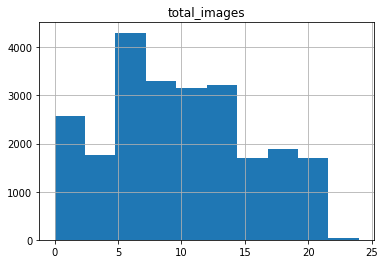

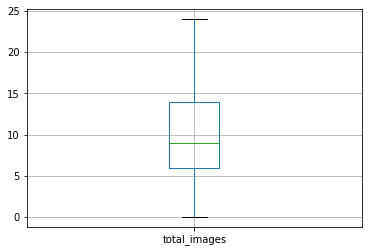

In [15]:
good_data = data.query('total_images < 25')
good_data.hist('total_images')
plt.show()
good_data.boxplot('total_images')
plt.show()

Далее разберемся с аномально большими значениями для столбца `last_price`. видим, что цена больше 20 млн встречается очень редко и можно отбросить эти значения. Так же значение стоимости меньше 1 млн выглядит нереальным, а значит эти данные тоже стоит исключить из выборки

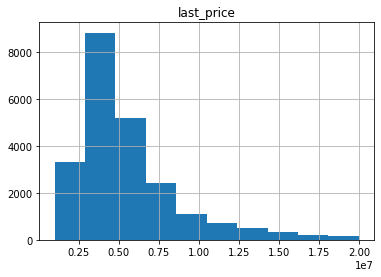

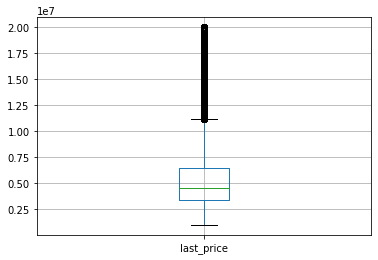

In [16]:
good_data = good_data.query('1000000 <= last_price <= 20000000')
good_data.hist('last_price')
plt.show()
good_data.boxplot('last_price')
plt.show()

Далее разберемся с аномально большими значениями для столбца `total_area`. Видим, что площадь больше $150 м^2$ встречается очень редко и можно отбросить эти значения. Так же значение площади меньше $10 м^2$ выглядит нереальным, а значит эти данные тоже стоит исключить из выборки

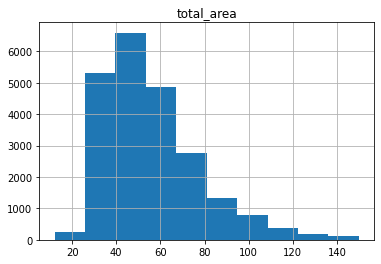

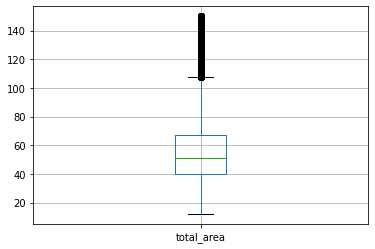

In [17]:
good_data = good_data.query('10 <= total_area <= 150')
good_data.hist('total_area')
plt.show()
good_data.boxplot('total_area')
plt.show()

Далее разберемся с аномально большими значениями для столбца `rooms`. Видим, что больше  6 комнат встречается очень редко и можно отбросить эти значения. Так же значение меньше 1 выглядит нереальным, а значит эти данные тоже стоит исключить из выборки

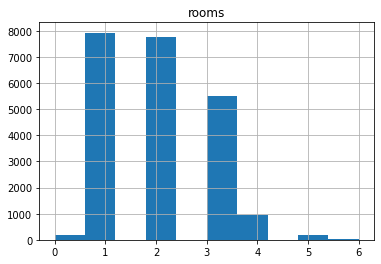

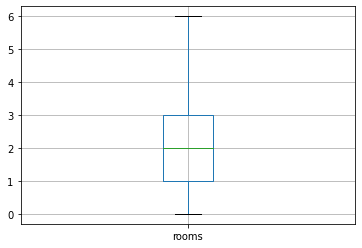

In [18]:
good_data = good_data.query('0 <= rooms <= 6')
good_data.hist('rooms')
plt.show()
good_data.boxplot('rooms')
plt.show()

Далее посмотрим на строчки,где высота потолков более 4м. Такие значения нереальны, но скорее всего при заполнении некоторых произошла ошибка (25 вместо 2.5 и т.д.)

In [19]:
good_data.query('ceiling_height > 4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06,3,4.15,3.0,44.2,2,False,...,12.2,0,санкт-петербург,20562.0,3167.0,2,344.0,1,838.0,38.0
355,17,3600000.0,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,...,NaN,2,гатчина,NaN,NaN,0,NaN,0,NaN,259.0
1129,20,6695000.0,36.9,2018-09-28,1,4.06,5.0,22.0,2,False,...,7.2,0,санкт-петербург,21725.0,2990.0,1,596.0,1,866.0,110.0
2639,17,4850000.0,59.7,2017-11-18,3,4.19,5.0,46.3,4,False,...,6.4,1,санкт-петербург,42964.0,15468.0,0,NaN,0,NaN,60.0
2802,7,14950000.0,50.0,2016-03-06,2,4.80,3.0,30.0,2,False,...,10.0,0,санкт-петербург,24433.0,1725.0,1,589.0,3,161.0,160.0
2823,8,2700000.0,39.0,2018-02-01,1,4.50,6.0,18.3,6,False,...,8.4,0,посёлок городского типа токсово,NaN,NaN,0,NaN,0,NaN,1836.0
2843,15,11990000.0,104.0,2018-03-13,3,4.20,3.0,66.0,2,False,...,15.0,0,санкт-петербург,22393.0,3884.0,0,NaN,0,NaN,350.0
2999,11,4450000.0,36.0,2017-12-12,1,4.19,5.0,18.0,1,False,...,8.0,0,санкт-петербург,24689.0,4256.0,1,1077.0,3,690.0,78.0
3067,13,6600000.0,95.0,2018-09-08,2,4.50,7.0,45.0,7,True,...,25.0,2,выборг,NaN,NaN,0,NaN,0,NaN,96.0
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3.0,53.0,2,False,...,8.0,0,волхов,NaN,NaN,0,NaN,0,NaN,1552.0


Очевидно, что значения от 20 до 40 получены из-за ошибки, на самом деле это значения от 2.0 до 4.0. Исправим эту ошибку и отбросим все значения более 4м. Но по нормам высота потолка должна быть не менее 2.5 м, а значит все данные с меньшими значениями стоит отбросить, но и потолки выше 3.8 м это очевидно выбросы, которыми тоже можно принебречь

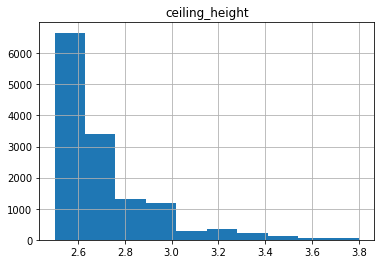

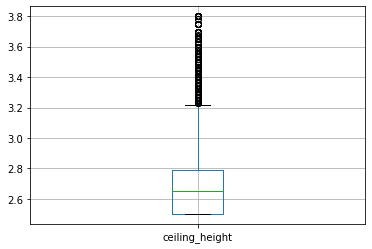

In [20]:
good_data.loc[(20 <= good_data['ceiling_height']) & (good_data['ceiling_height'] <= 40), 'ceiling_height'] = good_data['ceiling_height']/10
good_data = good_data.query('2.5 <= ceiling_height <= 3.8 | ceiling_height.isnull()')
good_data.hist('ceiling_height')
plt.show()
good_data.boxplot('ceiling_height')
plt.show()

Перейдем к столбцу `floors_total`. Ограничим значения в этом столбце 1 снизу и 30 сверху.

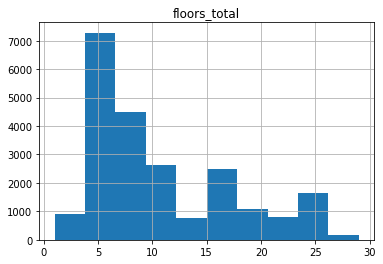

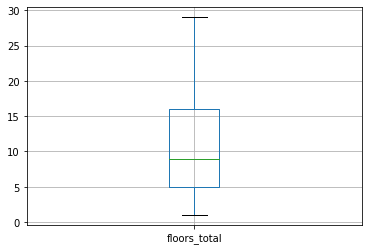

In [21]:
good_data = good_data.query('1 <= floors_total <= 30 | floors_total.isnull()')
good_data.hist('floors_total')
plt.show()
good_data.boxplot('floors_total')
plt.show()

Перейдем к столбцу `living_area`. Ограничим значения в этом столбце 10 снизу и 120 сверху, так как квартиры с площадью вне этих пределов выглядят нереально.

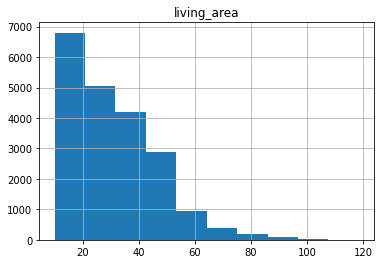

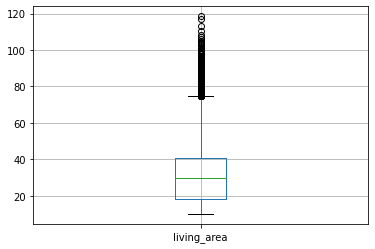

In [22]:
good_data = good_data.query('10 <= living_area <= 120 | living_area.isnull()')
good_data.hist('living_area')
plt.show()
good_data.boxplot('living_area')
plt.show()

Перейдем к столбцу `kitchen_area`. Ограничим значения в этом столбце сверху $25 м^2$, так как квартиры с площадью кухни больше этого значения выглядят как выбросы. Значения 0 подходят для описания например квартиры-студии.

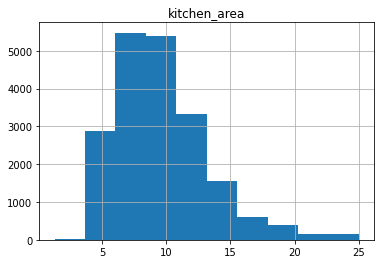

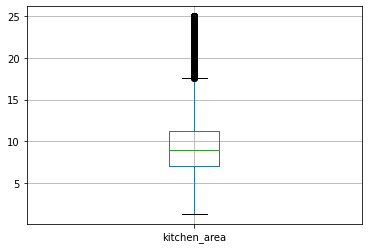

In [23]:
good_data = good_data.query('kitchen_area <= 25 | kitchen_area.isnull()')
good_data.hist('kitchen_area')
plt.show()
good_data.boxplot('kitchen_area')
plt.show()

Перейдем к столбцу `city_centers_nearest`. Ограничим значения в этом столбце сверху 40 км, так как квартир на большем расстоянии от центра очень мало и их можно считать выбросами.

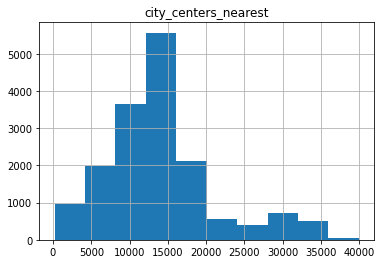

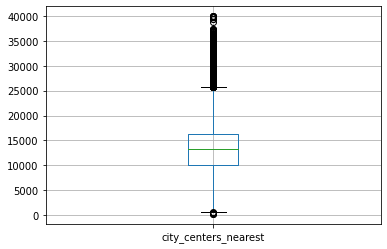

In [24]:
good_data = good_data.query('city_centers_nearest <= 40000 | city_centers_nearest.isnull()')
good_data.hist('city_centers_nearest')
plt.show()
good_data.boxplot('city_centers_nearest')
plt.show()

Перейдем к столбцу `parks_nearest`. Ограничим значения в этом столбце сверху 1.5 км, так как квартир на большем расстоянии от парков очень мало и их можно считать выбросами.

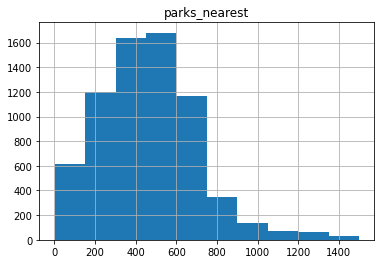

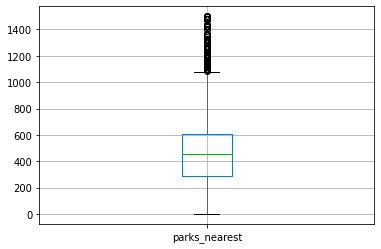

In [25]:
good_data = good_data.query('parks_nearest <= 1500 | parks_nearest.isnull()')
good_data.hist('parks_nearest')
plt.show()
good_data.boxplot('parks_nearest')
plt.show()

Перейдем к столбцу `days_exposition`. Ограничим значения в этом столбце сверху 600 днями, так как квартир, продающихся болле 2 лет очень мало и эти данные можно выбросить.

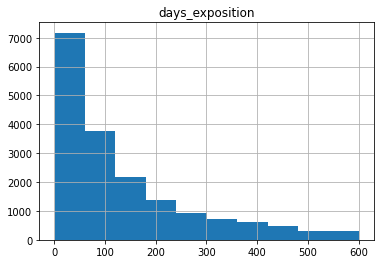

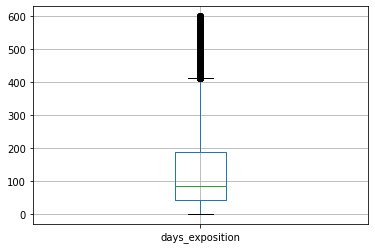

In [26]:
good_data = good_data.query('days_exposition <= 600')
good_data.hist('days_exposition')
plt.show()
good_data.boxplot('days_exposition')
plt.show()

**Из полученных данных убрали пропуски там где это возможно, изменили тип данных в тех столбцах где это было необходимо, устронили неявные дубликаты в столбце с названиями населенных пунктов и устранили выбивающиеся значения там где это требовалось.**

### Посчитайте и добавьте в таблицу новые столбцы

#### Посчитаем стоимость одного квадратного метра для каждой квартиры

In [28]:
good_data['cost_per_sq_m'] = good_data['last_price'] / good_data['total_area']

#### Добавим столбец с днем недели даты публикации

In [29]:
good_data['pub_weekday'] = good_data['first_day_exposition'].dt.dayofweek

#### Добавим столбец с месяцем даты публикации

In [30]:
good_data['pub_month'] = good_data['first_day_exposition'].dt.month

#### Добавим столбец с годом даты публикации

In [31]:
good_data['pub_year'] = good_data['first_day_exposition'].dt.year

#### Добавим столбец с типом этажа квартиры

In [32]:
floor_type = []
for index, row in good_data.iterrows():
    if row['floor'] == 1:
        floor_type.append('первый')
    elif row['floor'] == row['floors_total']:
        floor_type.append('последний')
    else:
        floor_type.append('другой')
good_data['floor_type'] = floor_type

#### Добавим расстояние до центра города в км

In [33]:
good_data['city_centers_nearest_km'] = (good_data['city_centers_nearest'] / 1000).round()

### Проведите исследовательский анализ данных

#### Подробнее рассмотрим некоторые столбцы

**Для начала проанализируем общую площадь квартир**

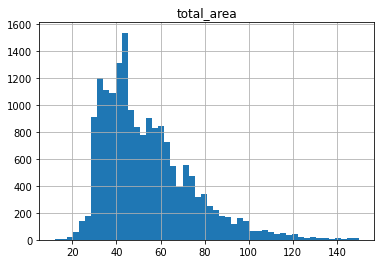

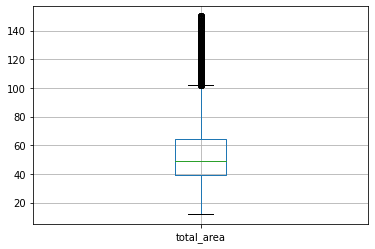

count    17856.000000
mean        53.996981
std         20.333147
min         12.000000
25%         39.000000
50%         49.200000
75%         64.225000
max        150.000000
Name: total_area, dtype: float64

In [34]:
good_data.hist('total_area', bins=50)
plt.show()
good_data.boxplot('total_area')
plt.show()
good_data['total_area'].describe()

Видим, что средняя площадь квартиры $54 м^2$, стандартное отклонение $20 м^2$. Стандартное отклонение довольно большое, но это логично так как площади квартир бываюют очень разные.

**Далее проанализируем жилую площадь квартир**

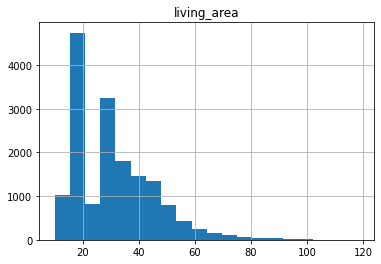

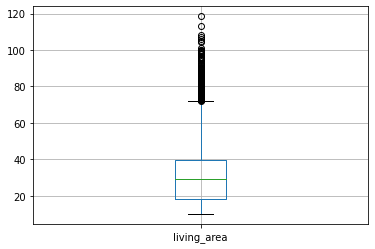

count    16372.000000
mean        30.897596
std         14.208155
min         10.000000
25%         18.000000
50%         29.000000
75%         39.700000
max        118.500000
Name: living_area, dtype: float64

In [35]:
good_data.hist('living_area', bins=20)
plt.show()
good_data.boxplot('living_area')
plt.show()
good_data['living_area'].describe()

Для жилой площади стандартное отклонение так же получилось большим относительно среднего значения(14 и 30 соответственно). Так же на гистограмме отчетливо видно два пика, около $20 м^2$ и около $30 м^2$.

**Теперь изучим информацию о площади кухни для каждой квартиры.**

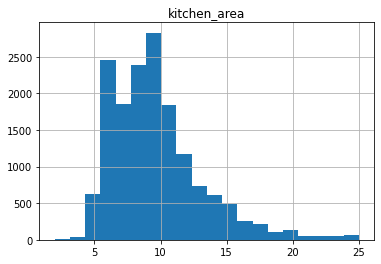

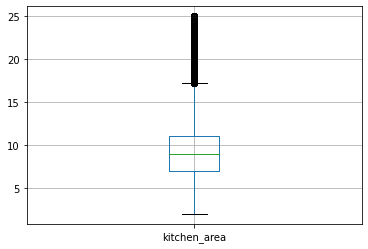

count    16017.000000
mean         9.668182
std          3.481580
min          2.000000
25%          7.000000
50%          9.000000
75%         11.100000
max         25.000000
Name: kitchen_area, dtype: float64

In [36]:
good_data.hist('kitchen_area', bins=20)
plt.show()
good_data.boxplot('kitchen_area')
plt.show()
good_data['kitchen_area'].describe()

Видим примерно одинаковое количество кухонь с площадью от $5$ до $10 м^2$. Так же среднее отклонение сравнительно небольшое, что говорит об отсутствии серьезных выбросов

**Теперь изучим информацию о цене каждой квартиры.**

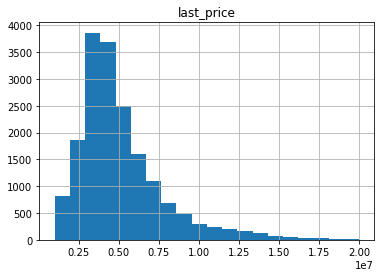

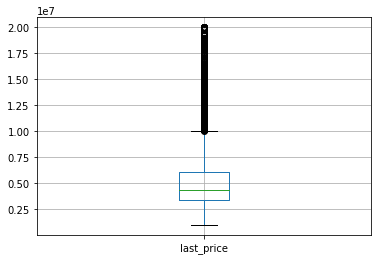

count    1.785600e+04
mean     5.103088e+06
std      2.731904e+06
min      1.000000e+06
25%      3.380000e+06
50%      4.400000e+06
75%      6.050000e+06
max      2.000000e+07
Name: last_price, dtype: float64

In [37]:
good_data.hist('last_price', bins=20)
plt.show()
good_data.boxplot('last_price')
plt.show()
good_data['last_price'].describe()

Видим, что средняя цена за квартиру около 5 млн., а по полученному значению дисперсии можем сделать вывод об отсутствии сильных выбросов.

**Теперь изучим информацию о количестве комнат в каждой квартире.**

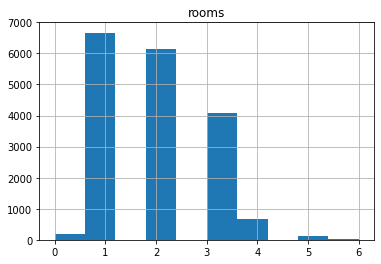

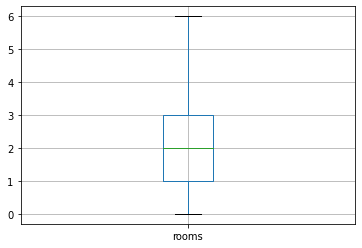

count    17856.000000
mean         1.930276
std          0.920478
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [38]:
good_data.hist('rooms', bins=10)
plt.show()
good_data.boxplot('rooms')
plt.show()
good_data['rooms'].describe()

Видим, что распределение выглядит очень правдоподобно. Продаются в основном однокомнатный, двухкомнатные и трехкомнатные квартиры.

**Перейдем к исследованию высоты потолков**

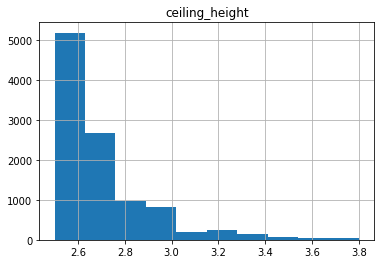

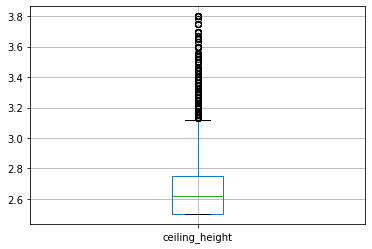

count    10359.000000
mean         2.690288
std          0.215815
min          2.500000
25%          2.500000
50%          2.620000
75%          2.750000
max          3.800000
Name: ceiling_height, dtype: float64

In [39]:
good_data.hist('ceiling_height')
plt.show()
good_data.boxplot('ceiling_height')
plt.show()
good_data['ceiling_height'].describe()

По полученным данным можем сделать вывод, что в основном высота потолков в квартире 2.7 м. А позначению дисперсии видно что сильных выбросов нет.

**Исследуем статистику по этажам, на которых расположены квартиры**

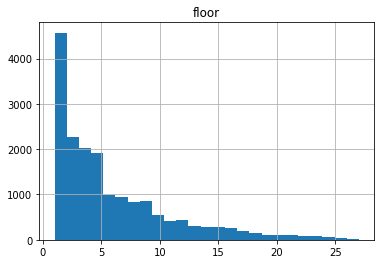

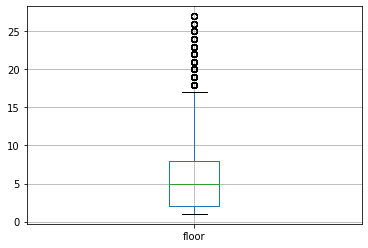

count    17856.000000
mean         6.086470
std          4.988199
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [40]:
good_data.hist('floor', bins=25)
plt.show()
good_data.boxplot('floor')
plt.show()
good_data['floor'].describe()

Видно, что в основном квартиры располагаются с первого по пятый этаж, а так же группа чуть меньше с пятого по десятый, но есть и выбросы, которые стоит учесть.

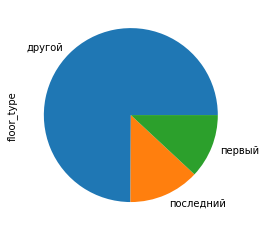

In [41]:
good_data['floor_type'].value_counts().plot(kind='pie')
plt.show()

Видим, что доля квартир на первом и последнем этажах примерно одинакова и сильно меньше всех остальных.

**Перейдем к данным о количестве этажей в доме**

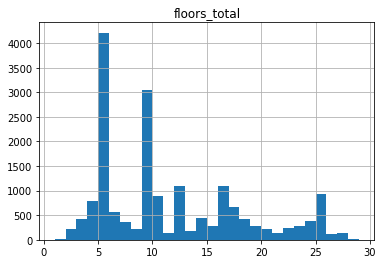

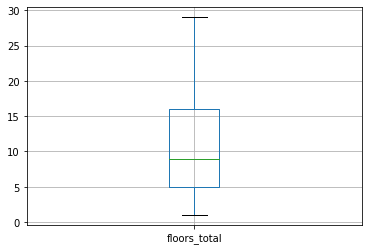

count    17788.000000
mean        11.115865
std          6.651017
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

In [42]:
good_data.hist('floors_total', bins=28, range=(1, 29))
plt.show()
good_data.boxplot('floors_total')
plt.show()
good_data['floors_total'].describe()

Видим, что в распределении наблюдается несколько типов, это типичная высота зданий, которые встречаются наиболее часто это 4, 9, 12, 16 и 25 этажей. Здания с другим количеством этаже встречаются гораздо реже.

**Изучим расстояние до центра города в метрах**

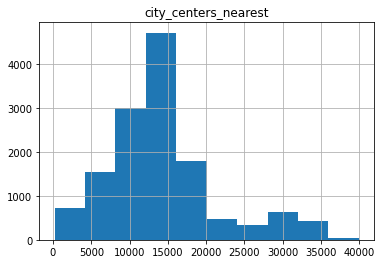

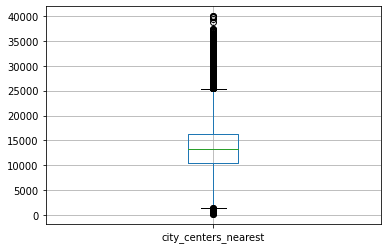

count    13692.000000
mean     14202.679594
std       7102.924351
min        208.000000
25%      10360.000000
50%      13370.000000
75%      16383.500000
max      39936.000000
Name: city_centers_nearest, dtype: float64

In [43]:
good_data.hist('city_centers_nearest')
plt.show()
good_data.boxplot('city_centers_nearest')
plt.show()
good_data['city_centers_nearest'].describe()

Видим два пика на гистограмме, а так же видим что отклонение от среднего велико. Это обучсловленно географическими особенностями расположения Санкт-Петербурга.

**Рассмотрим расстояния до ближайшего аэропорта**

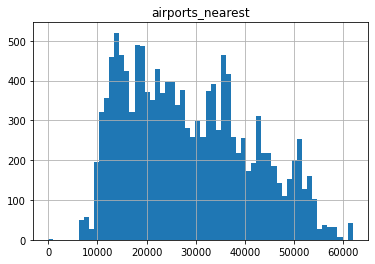

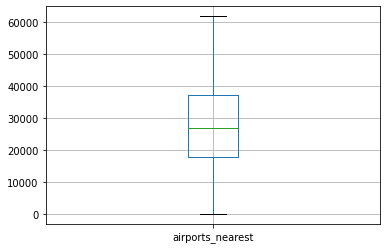

count    13675.000000
mean     28534.893090
std      12505.243599
min          0.000000
25%      17955.000000
50%      26880.000000
75%      37364.000000
max      61908.000000
Name: airports_nearest, dtype: float64

In [44]:
good_data.hist('airports_nearest', bins=60)
plt.show()
good_data.boxplot('airports_nearest')
plt.show()
good_data['airports_nearest'].describe()

В данном случае отклонение от среднего тоже получается большим, это так же можно объяснить географическим расположением аэропорта,относительно города

**Рассмотрим расстояния до ближайшего парка**

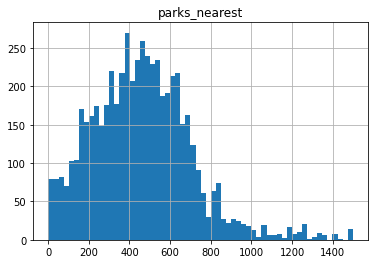

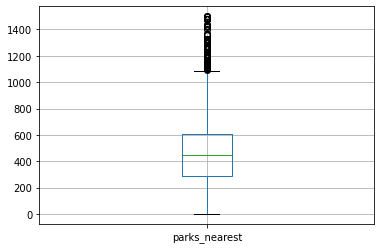

count    5651.000000
mean      460.016811
std       245.378978
min         1.000000
25%       287.000000
50%       450.000000
75%       607.500000
max      1499.000000
Name: parks_nearest, dtype: float64

In [45]:
good_data.hist('parks_nearest', bins=60)
plt.show()
good_data.boxplot('parks_nearest')
plt.show()
good_data['parks_nearest'].describe()

Видно, что парки располагаются в основном в радиусе 800 метров от домов, иногда встречаются дома в радиусе полутора километров, их мы не будем считать выбросами

**Рассмотрим день и месяц публикации объявления**

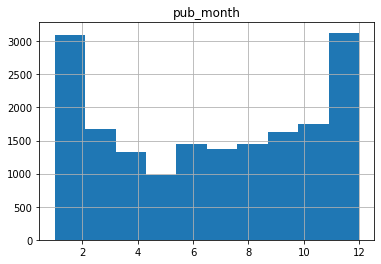

In [46]:
good_data.hist('pub_month')
plt.show()

Видим, что квартиры зимой продают чаще чем летом.

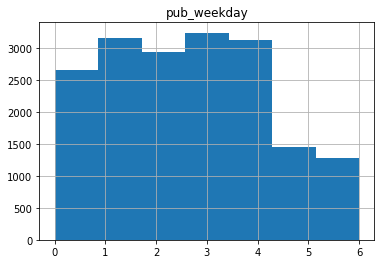

In [47]:
good_data.hist('pub_weekday', bins=7)
plt.show()

Видим, что квартиры в будние дни выставляются на продажу чаще чем на выходных

#### Изучим, как быстро продавались квартиры

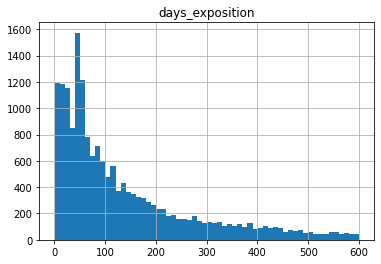

среднее значение: 136.72261424731184
медианное значение: 86.0


count    17856.000000
mean       136.722614
std        135.592010
min          1.000000
25%         42.000000
50%         86.000000
75%        190.000000
max        600.000000
Name: days_exposition, dtype: float64

In [48]:
good_data.hist('days_exposition', bins=60)
plt.show()
print('среднее значение:', good_data['days_exposition'].mean())
print('медианное значение:', good_data['days_exposition'].median())
good_data['days_exposition'].describe()

По полученным данным и гистограмме видим, что квартиры в основном продаются в течении 80 дней и меньше. Продажи менее 3 дней можно считать быстрыми, продажи более 190 дней долгими. 

#### Узнаем, какие факторы больше всего влияют на общую (полную) стоимость объекта

Начнем с проверки влияния общей площади на полную стоимость

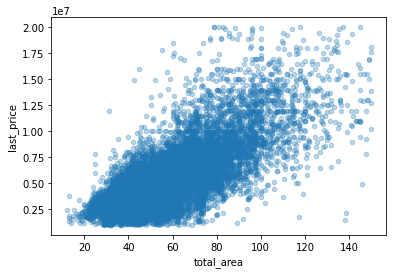

Коэффициент корреляции: 0.7502947010211826


In [49]:
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print('Коэффициент корреляции:', good_data['total_area'].corr(good_data['last_price']))

Проверим влияние жилой площади на полную стоимость

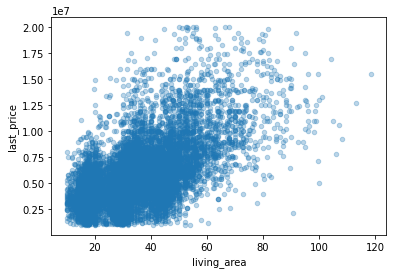

Коэффициент корреляции: 0.6432878913278893


In [50]:
good_data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print('Коэффициент корреляции:', good_data['living_area'].corr(good_data['last_price']))

Проверим влияние площади кухни на полную стоимость

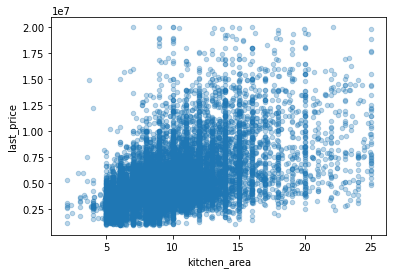

Коэффициент корреляции: 0.5253046264892158


In [51]:
good_data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print('Коэффициент корреляции:', good_data['kitchen_area'].corr(good_data['last_price']))

Проверим влияние количества комнат на полную стоимость

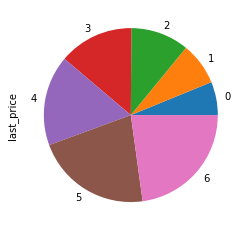

Коэффициент корреляции: 0.4842516066842976


In [52]:
good_data.groupby('rooms')['last_price'].mean().sort_values().plot(kind='pie')
plt.show()
print('Коэффициент корреляции:', good_data['rooms'].corr(good_data['last_price']))

Видно, что средняя стоимость увеличивается с увеличение количества комнат в квартире.

Проверим влияние этажа, на котором расположена квартира, на полную стоимость

In [53]:
floor_type_int = []
for index, row in good_data.iterrows():
    if row['floor'] == 1:
        floor_type_int.append(1)
    elif row['floor'] == row['floors_total']:
        floor_type_int.append(2)
    else:
        floor_type_int.append(3)
good_data['floor_type_int'] = floor_type_int

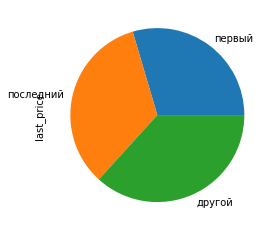

Коэффициент корреляции: 0.12631808661803628


In [54]:
good_data.groupby('floor_type')['last_price'].mean().sort_values().plot(kind='pie')
plt.show()
print('Коэффициент корреляции:', good_data['floor_type_int'].corr(good_data['last_price']))

Корреляция между стоимостью квартиры и этажом, на котором она расположена, практически отсутствует.

Проверим влияние даты публикации, на полную стоимость

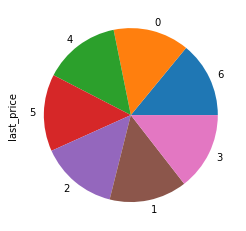

Коэффициент корреляции: -0.0025893897067738834


In [55]:
good_data.groupby('pub_weekday')['last_price'].mean().sort_values().plot(kind='pie')
plt.show()
print('Коэффициент корреляции:', good_data['pub_weekday'].corr(good_data['last_price']))

Корреляция между днем недели, когда было опубликованно объявление, и стоимостью квартиры отсутствует.

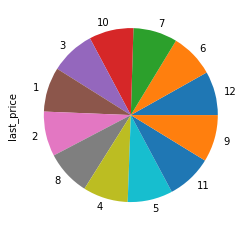

Коэффициент корреляции: 0.005121310992529618


In [56]:
good_data.groupby('pub_month')['last_price'].mean().sort_values().plot(kind='pie')
plt.show()
print('Коэффициент корреляции:', good_data['pub_month'].corr(good_data['last_price']))

Корреляция между месяцем, когда было опубликованно объявление, и стоимостью квартиры отсутствует.

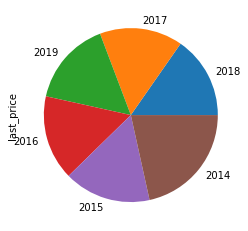

Коэффициент корреляции: -0.018213641419911573


In [57]:
good_data.groupby('pub_year')['last_price'].mean().sort_values().plot(kind='pie')
plt.show()
print('Коэффициент корреляции:', good_data['pub_year'].corr(good_data['last_price']))

Корреляция между годом, когда было опубликованно объявление, и стоимостью квартиры отсутствует.

**Вывод: Из полученных результатов видно, что основными факторами, влияющими на стоимость квартиры являются общая площадь, жилая площадь, площадь кухни и количество комнат в квартире. Такие параметры как дата публикации и этаж на котором расположена квартира очень слабо влияют на изменение стоимости, их корреляция почти равна 0**

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [58]:
local = good_data.groupby('locality_name')['cost_per_sq_m'].count().sort_values(ascending=False).head(10).index
local

Index(['санкт-петербург', 'мурино', 'кудрово', 'посёлок шушары', 'всеволожск',
       'колпино', 'посёлок парголово', 'пушкин', 'гатчина', 'выборг'],
      dtype='object', name='locality_name')

In [59]:
top_local = good_data.query('locality_name in @local')
(
    top_local.pivot_table(index='locality_name', values='cost_per_sq_m', aggfunc='mean')
    .sort_values('cost_per_sq_m', ascending=False)
    .head(10)
)

,cost_per_sq_m
locality_name,
санкт-петербург,106434.989628
пушкин,100441.004056
кудрово,94614.385125
посёлок парголово,89502.992676
мурино,85846.680463
посёлок шушары,77969.480867
колпино,74717.828521
гатчина,68253.572256
всеволожск,66728.488970


**Вывод: из попавших в выборку населенных пунктов самая большая средняя стоимость квадратного метра жилья в Санкт-Петербурге, Пушкине и Кудрово. Самая маленькая средняя стоимость квадратного метра жилья в Гатчине, Всеволожске и Выборге.**

#### Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра

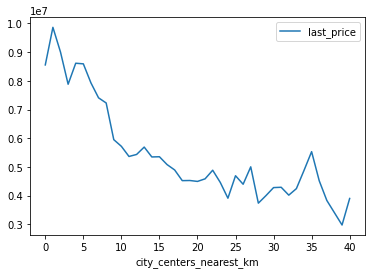

In [60]:
spb_info = good_data.pivot_table(index='city_centers_nearest_km',  values='last_price', aggfunc='mean')
spb_info.plot()
plt.show()

**Видим что квартиры дешевеют по мере удаления от центра.**

**Вывод: Полученные данные говорят о том, что существуют наиболее важные параметры в объявлении, которые большего всего влияют на стоимость квартиры**

### Общий вывод

В нашем распоряжении были данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 

Была поставлена задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. 

О каждой квартире в базе содержалось два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

В ходе предобработки данных в таблице было обнаруженно большое количество пропусков и неявных дубликатов в названии населенных пунктов. Пропуски в таких столбцах как высота потолка, количество этажей в доме, жилая площадь, площадь кухни, название населенного пункта, расстояние до ближайшего аэропорта, расстояние до центра города, расстояние до ближайшего парка и расстояние до ближайшего водоема заполнить какими то данными невозможно, так как невозможно опираясь на другие данные в таблице сделать какие-то предположения о пропущенных значениях. Вышеперечисленные пропуски, скорее всего, появились из-за того, что продавец просто не указал эти данные в своем объявлении. Столбец с информацией о том, сколько дней прошло с момента публикации до продажи тоже имеет пропуски, но их можно заполнить разностью между датой публикации и текущей датой. Этот пропуск, возможно,  вызван тем, что квартира еще продается и система не записывает автоматически разность текущей даты и даты публикации, а мы это исправим. Пропуски в столбцах с информацией о количестве балконов и о том, является ли квартира апартаментами вызваны тем, что не заполнение этого параметра логически обозначает отсутствие балкона и отрицательный ответ на вопрос об апартаментах, а значит можно заполнить пропуски нулями и значениями `False` соответственно. 

Неявные дубликаты в столбце с названием населенного пункта вызванны, в основном, двойным написанием буквы -ё- в словах(где-то пишут -ё-, а где-то -е-). Эти пропуски мы исправили и привели данные в порядок.

Для удобства дальнейшего анализа так же были добавленны новые столбцы в таблицу:

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений);

В работе изучены и описаны следующие параметры:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

В ходе изучения получены следующие выводы:

- Cредняя площадь квартиры $54 м^2$, стандартное отклонение $24 м^2$. Стандартное отклонение довольно большое, но это логично так как площади квартир бываюют очень разные.
- Для жилой площади стандартное отклонение так же получилось большим относительно среднего значения(14 и 30 соответственно). Так же на гистограмме отчетливо видно два пика, около $20 м^2$ и около $30 м^2$.
- Примерно одинаковое количество кухонь с площадью от  5  до  10м2. Так же среднее отклонение сравнительно небольшое, что говорит об отсутствии серьезных выбросов
- Средняя цена за квартиру около 5 млн., а по полученному значению дисперсии можем сделать вывод об отсутствии сильных выбросов.
- Продаются в основном однокомнатный, двухкомнатные и трехкомнатные квартиры.
- В основном высота потолков в квартире 2.7 м. А позначению дисперсии видно что сильных выбросов нет.
- Доля квартир на первом и последнем этажах примерно одинакова и сильно меньше всех остальных.
- Видим, что в распределении наблюдается несколько типов, это типичная высота зданий, которые встречаются наиболее часто это 4, 9, 12, 16 и 25 этажей. Здания с другим количеством этаже встречаются гораздо реже.
- Для расстояния от центра видим два пика на гистограмме, а так же видим что отклонение от среднего велико. Это обучсловленно географическими особенностями расположения Санкт-Петербурга.
- Для расстояния от аэропорта отклонение от среднего тоже получается большим, это так же можно объяснить географическим расположением аэропорта,относительно города
- Видно, что парки располагаются в основном в радиусе 800 метров от домов, иногда встречаются дома в радиусе полутора километров, их мы не будем считать выбросами
- Квартиры зимой продают чаще чем летом.
- Квартиры в будние дни выставляются на продажу чаще чем на выходных

Так же получили информацию о том, как быстро продавались квартиры. Этот параметр показывает, сколько дней было размещено каждое объявление. Видим, что квартиры в основном продаются в течении 80 дней и меньше. Продажи менее 3 дней можно считать быстрыми, продажи более 190 дней долгими.

Провели исследование о том, от каких из следующих факторов больше всего зависит общая (полная) стоимость объекта:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

Получили, что основными факторами, влияющими на стоимость квартиры являются общая площадь, жилая площадь, площадь кухни и количество комнат в квартире. Такие параметры как дата публикации и этаж на котором расположена квартира очень слабо влияют на изменение стоимости, их корреляция почти равна 0

Была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
Из попавших в выборку населенных пунктов самая большая средняя стоимость квадратного метра жилья в Санкт-Петербурге(106434.99), Пушкине(100441.00) и Кудрово(94614.38). Самая маленькая средняя стоимость квадратного метра жилья в Гатчине(68253.57), Всеволожске(66728.48) и Выборге(57615.74).

Была вычислена средняя цена километра от центра города. 
Получили, что средняя стоимость квартиры уменьшается по мере удаления от центра

**Общий вывод: в данных было довольно много пропусков, которые появились в результате не полного заполнения продавцами описаний квартир. Так же при обработке отброшены экстримальные значения, которые портили бы статистику. Было получено, что основными факторами, влияющими на стоимость квартиры являются её площадь, как полная так и чисто жилая, площадь кухни и количество комнат в квартире. Срок продажи квартир, в основном, составляет менее 80 дней. Самый дорогой квадратный метр жилья(106434.98) ожидаемо получился в Санкт-Петербурге, а самый дешевый(57615.74) в Выборге.
Рекомендую сделать большинство пунктов в анкете обязательными для заполнения, так как это упростит поиск и увеличит точность статистики**